In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/food/Dataset.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
df = pd.DataFrame(df)


In [ ]:
le = LabelEncoder()
df['Road_traffic_density'] = le.fit_transform(df['Road_traffic_density'])
df['Weather_conditions'] = le.fit_transform(df['Weather_conditions'])

In [ ]:
le = LabelEncoder()
df['Type_of_order'] = le.fit_transform(df['Type_of_order'])
X = df[['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order']]
y = df['Time_taken (min)']

In [ ]:
model = RandomForestRegressor(n_estimators=5, random_state=42)
model.fit(X, y)

RandomForestRegressor(n_estimators=5, random_state=42)

In [ ]:
pred = model.predict([[4.5, 5, 1, 2]])
print("Predicted Delivery Time:", pred)

Predicted Delivery Time: [17.72910507]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


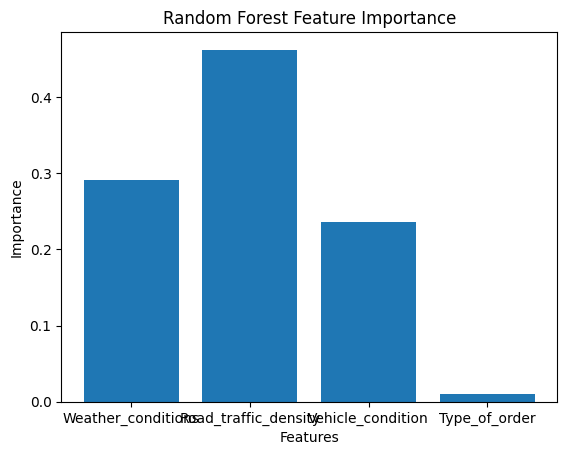

In [ ]:
importance = model.feature_importances_

plt.figure()
plt.bar(X.columns, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

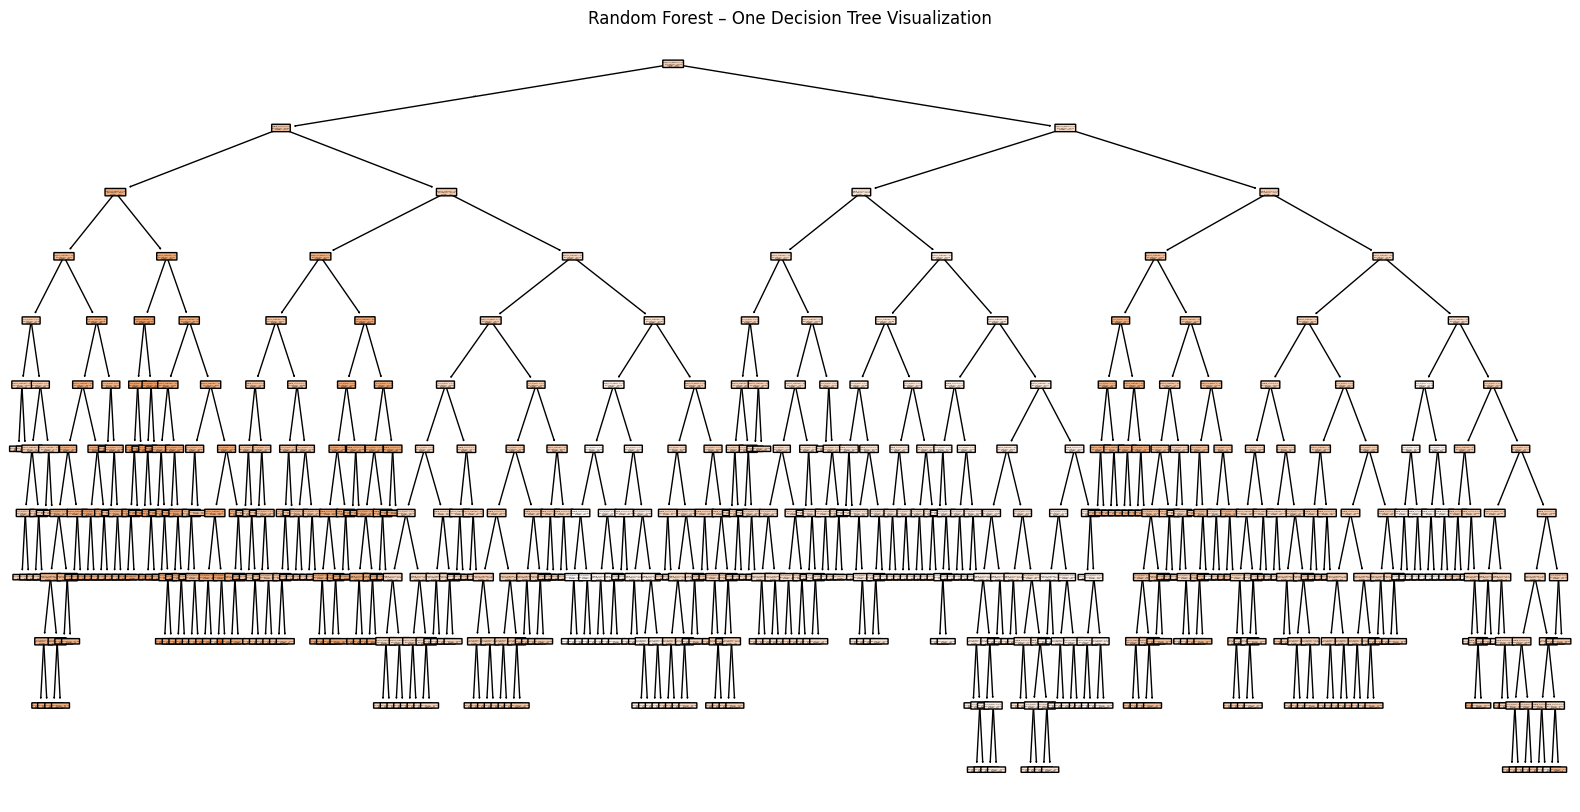

In [12]:
tree = model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Random Forest – One Decision Tree Visualization")
plt.show()